#[경사 하강법](https://)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

#[sympy](https://)

In [ ]:
#파이썬에서 미분
#sympy는 방정식 기호(symbol)를 사용하게 해주는 라이브러리
#다중 미분은 diff(식, 변수, 미분횟수)로 사용할 수 있음
import sympy as sym
from sympy.abc import x

#poly(2*x + 2, x, domain='zz')
print(sym.diff(sym.poly(x**2 + 2*x + 3), x))

print(sym.diff(sym.poly(x**3 + 2*x**2 + 3), x))

Poly(2*x + 2, x, domain='ZZ')
Poly(3*x**2 + 4*x, x, domain='ZZ')


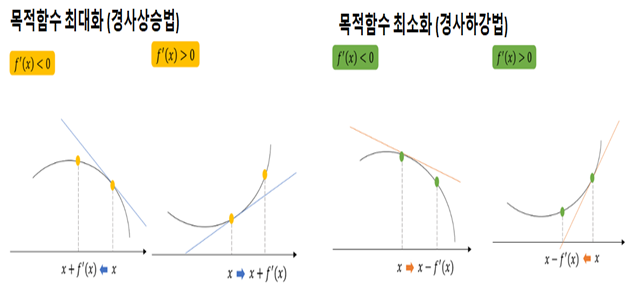



---



#[파이썬 경사하강법 구현(1](https://)-https://iyousys.tistory.com/42

[0.25364751 0.96966761 0.92022579 0.51337109 0.1001374  0.64588505
 0.52388196 0.63462012 0.449079   0.5422151  0.50272032 0.172836
 0.44393108 0.67847048 0.93000231 0.14924549 0.61995206 0.65888948
 0.14165417 0.37701076 0.89339555 0.50252107 0.51878975 0.63984535
 0.46085581 0.29237015 0.62726442 0.26375505 0.37556384 0.04209854
 0.52407839 0.91469608 0.53103237 0.26393329 0.98668474 0.91487324
 0.6717228  0.11381881 0.95237293 0.43047881 0.12637589 0.56232126
 0.93286815 0.91584747 0.96114827 0.37482436 0.50033836 0.40997566
 0.94082368 0.82959081 0.71363905 0.1549174  0.72509838 0.66227937
 0.24243574 0.36242824 0.73173447 0.58874428 0.20197157 0.60594969
 0.48346267 0.74500655 0.61714723 0.2677625  0.95659647 0.80531697
 0.55720015 0.11955789 0.09116372 0.44123016 0.51198478 0.65870258
 0.56879598 0.53270751 0.597078   0.395554   0.34007963 0.25705591
 0.79444326 0.15198783 0.23511094 0.73244197 0.27172908 0.70311651
 0.18395437 0.78366971 0.76115463 0.06715235 0.05731497 0.257507

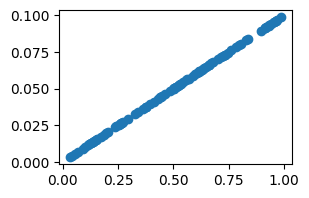

In [ ]:
#파이썬을 경사하강법 구현
#업데이트할 W : Learning Rate*((Y예측-Y실체)*X)평균
#업데이트할 b: Learning Rate*((Y예측-Y실체)*1)평균

import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100)
print(X)
Y = 0.2 * X * 0.5

plt.figure(figsize=(3, 2))
plt.scatter(X, Y)
plt.show()

0.5604872870800666 0.006560988997104111
0.45191438307568393 -0.1608357943349141


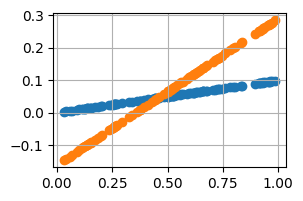

0.42757639666287245 -0.1726691595379791
0.4130378365477856 -0.16761453686103234
0.40006686910321426 -0.16095807967839623
0.3877354620234272 -0.15437529048404963
0.37592208765648116 -0.1480407166013493


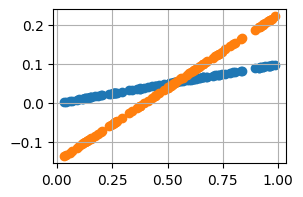

0.36459497051408796 -0.14196375643983053
0.3537329897983665 -0.13613599538053706
0.3433169231780264 -0.13054744183424039
0.33332845120057875 -0.12518830231859035
0.32375001900138045 -0.1200491619937685


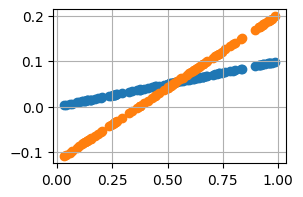

0.3145647937499824 -0.11512098993077423
0.30575663377793744 -0.11039512564717668
0.29731006006983723 -0.10586326415305661
0.289210229045567 -0.10151744138551871
0.28144290647321807 -0.09735002021628174


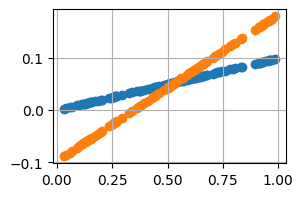

0.27399444245438026 -0.09335367703093315
0.26685174743648227 -0.08952138885882023
0.2600022692098739 -0.08584642103124232
0.25343397084921 -0.08232231534628634
0.24713530956036853 -0.07894287871951065


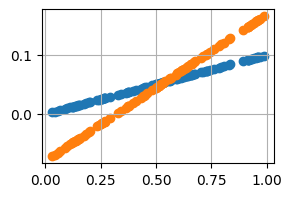

0.24109521639573042 -0.07570217230053285
0.23530307680217266 -0.07259450103639555
0.2297487119675916 -0.06961440366336936
0.2244223609331752 -0.06675664310960537
0.2193146634399894 -0.06401619729177076


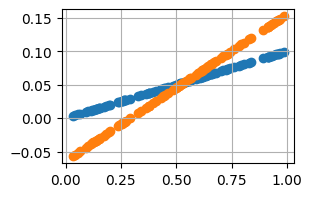

0.21441664347973444 -0.061388250289494566
0.2097196935207633 -0.05886818388211369
0.20521555938164257 -0.05645156943284632
0.20089632572567306 -0.05413416010613042
0.19675440215087883 -0.051911883404450535


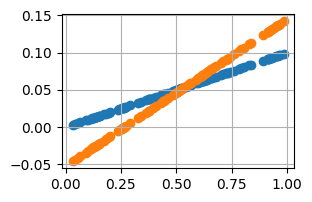

0.19278250985102002 -0.049780834011537385
0.1889736688241883 -0.047737266929363247
0.18532118560650587 -0.045777590896872555
0.18181864150937171 -0.043898362078882036
0.17845988133958413 -0.042096278014059546


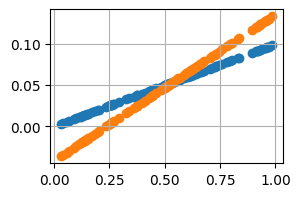

0.17523900258251665 -0.04036817181134616
0.17215034502933843 -0.0387110065846226
0.16918848083005059 -0.03712187011583972
0.16634820495485816 -0.03559796973723432
0.16362452604711492 -0.03413662742363662


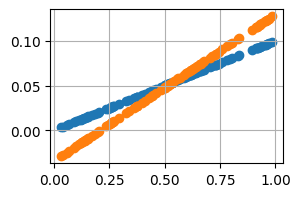

0.1610126576517666 -0.0327352750862447
0.15850800980387772 -0.03139145005959567
0.15610618096246023 -0.03010279077380236
0.15380295027542884 -0.02886703260445026
0.1515942701620897 -0.02768200389286158


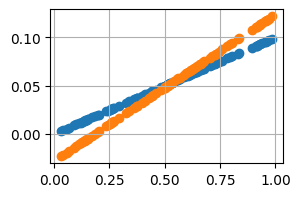

0.14947625920012772 -0.02654562212973247
0.14744519530459188 -0.02545589029543692
0.14549750918689214 -0.024410893350565836
0.1436297780823128 -0.02340879487053398
0.14183871973501969 -0.022447833818340614


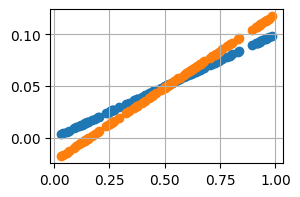

0.14012118662999015 -0.021526321449812504
0.13847416046173008 -0.02064263834589061
0.136894746830057 -0.01979523156674523
0.1353801701536281 -0.01898261192271839
0.1339277687922745 -0.018203351357297514


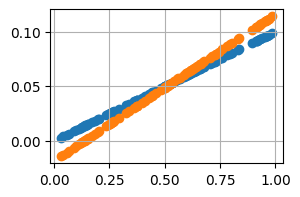

0.13253499036956992 -0.017456080437521403
0.13119938728741393 -0.016739485947408296
0.1299186124247472 -0.016052308580176727
0.12869041501284026 -0.015393340725203706
0.12751263667990662 -0.01476142434583115


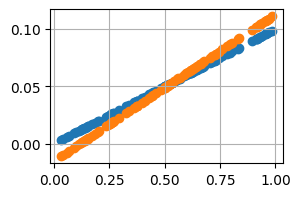

0.12638320765808983 -0.014155448944291013
0.12530014314615856 -0.013574349610172875
0.12426153982151758 -0.013017105149004475
0.12326557249540529 -0.01248273628765635
0.12231049090539964 -0.011970303953416968


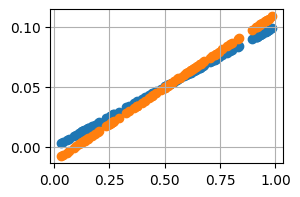

0.12139461663959579 -0.011478907623714002
0.12051634018705022 -0.011007683743581681
0.1196741181093079 -0.010555804208093118
0.11886647032804193 -0.010122474907090753
0.11809197752403897 -0.00970693432965747


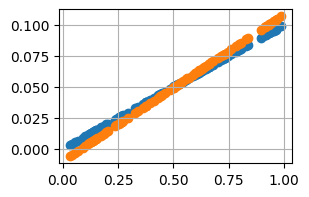

0.11734927864295971 -0.00930845222587599
0.11663706850349113 -0.00892632832352469
0.11595409550368702 -0.008559891097454793
0.11529915942146628 -0.008208496589486126
0.1146711093054036 -0.007871527276747718


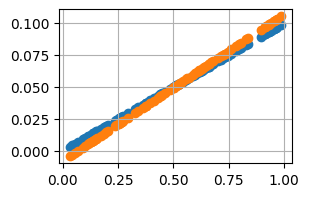

0.11406884145210583 -0.007548390986474449
0.11349129746661962 -0.007238519855352702
0.11293746240246193 -0.006941369331586177
0.11240636297800453 -0.006656417217928237
0.11189706586607832 -0.006383162753998953


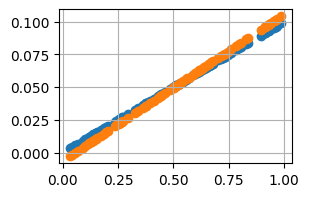

0.11140867605379152 -0.0061211257362742385
0.11094033526967945 -0.005869845674200553
0.1104912204754218 -0.005628880980952176
0.11006054241947692 -0.005397808197408937
0.1096475442500912 -0.005176221247990648


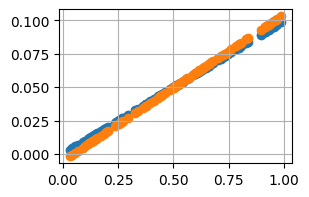

0.10925150018524617 -0.004963730727040507
0.1088717142372061 -0.004759963214503344
0.10850751898942443 -0.004564560619696186
0.10815827442365983 -0.004377179552017857
0.10782336679524061 -0.004197490717491778


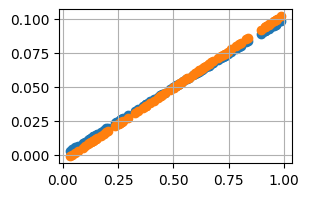

0.10750220755450104 -0.004025178340081434
0.10719423231249399 -0.0038599396067616107
0.10689889984916244 -0.0037014841353701527
0.10661569116222688 -0.0035495334643050776
0.10634410855511701 -0.0034038205631703113


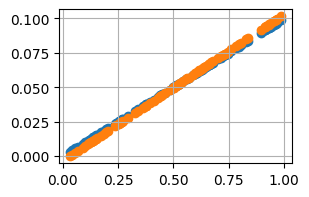

0.10608367476234505 -0.0032640893635100124
0.1058339321107836 -0.003130094308806878
0.10559444171537413 -0.0030015999229535614
0.10536478270785267 -0.0028783803964389453


In [ ]:
def plot_prediction(pred, y):
  plt.figure(figsize=(3, 2))
  plt.grid()
  plt.scatter(X, y)
  plt.scatter(X, pred)
  plt.show()

## Gradient Descent 구현
W = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
print(W, b)

learning_rate = 0.7

for epoch in range(100):
    Y_Pred = W * X + b

    error = np.abs(Y_Pred - Y).mean()
    if error < 0.001:
        break
    #gradient descent
    w_grad = learning_rate * ((Y_Pred - Y)*X).mean()
    b_grad = learning_rate * (Y_Pred - Y).mean()

    #W, b 값 갱신
    W = W - w_grad
    b = b - b_grad
    print(W, b)
    if epoch % 5 == 0:
        Y_Pred = W * X + b
        plot_prediction(Y_Pred, Y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#직접 모듈 삽입
from google.colab import files
#src = list(files.upload().values())[0]
#open('mod1.py','wb').write(src) #모듈이름에 따라 mod1.py 등을 수정하면 됨
fileupload=files.upload()



---



#[파이썬 경사하강법 구현(2)](https://) - https://teddylee777.github.io/scikit-learn/gradient-descent/

- 기본 개념은 함수의 기울기(경사)를 구하여 [기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지](https://) 반복시키는 것
- 비용 함수(Cost Function 혹은 Loss Function)를 최소화하기 위해 반복해서 [파라미터를 업데이트 해](https://) 나가는 방식

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')



---



#[샘플에 활용할 데이터 셋 만들기](https://)

In [ ]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)

    y = w * x + b
    #균일 분포(uniform distribution)에서 난수를 생성하는데 사용.
    #균일 분포 : 모든 가능한 값에 대해 확률이 균일하게 분포된 분포
    #최솟값과 최댓값 사이의 값들이 모두 나올 확률이 동일.
    #기본 형식 : np.random.uniform(low, high, size)
    #low : 난수의 최솟값
    #high : 최댓값
    #size : 난수의 개수(생략가능)
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise

    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

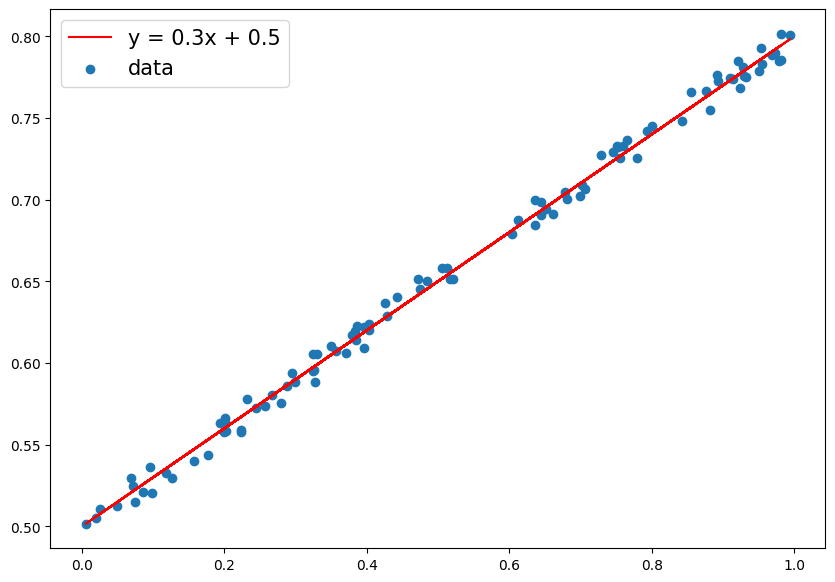

w: 0.3, b: 0.5


In [ ]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)



---



#[초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의](https://)

- w, b 값에 대하여 random한 초기 값을 설정

In [ ]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

- y_hat은 prediction은 값(즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의)

In [ ]:
y_hat = w * x + b



---



#[오차(Error) 정의](https://)

- Loss Function 혹은 Cost Function을 정의함
>- Loss (Cost) Function은 [예측값인 y_hat과 y의 차이에 제곱의 평균](https://)으로 정의
>>- 제곱은 [오차에 대한 음수 값을 허용하지 않으며](https://), 이는 Mean Squared Error(MSE)인 평균 제곱 오차 평가 지표와 관련 있음

In [ ]:
# 코드를 입력해 주세요
error = (y_hat - y) ** 2



---



#[학습률(Learning Rate)](https://)

In [ ]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png')

- 한 번 학습할 때 얼마만큼 가중치(weight)를 [업데이트 해야 하는지 학습 양을 의미](https://)
>- 너무 [큰 학습률](https://)(Learning Rate)은 [가중치 갱신이 크게 되어 자칫 Error가 수렴하지 못하고 발산할 수 있음](https://)
>- 너무 [작은 학습률은](https://) 가중치 갱신이 [작게 되어 가중치 갱신이 충분히 되지 않고, 학습이 끝나 버릴 수 있음(](https://)즉 과소 적합되어 있는 상태로 남아 있을 수 있음)



---



#[Gradient Descent 구현(단항식)](https://)

In [ ]:
# 최대 반복 횟수
num_epoch = 500

# 학습율 (learning_rate)
learning_rate = 0.5

In [ ]:
errors = []

# random 한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00005:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.13763, b = 0.64402 error = 0.02538
 5 w = 0.14509, b = 0.58713 error = 0.00240
10 w = 0.17006, b = 0.57288 error = 0.00170
15 w = 0.19112, b = 0.56110 error = 0.00121
20 w = 0.20880, b = 0.55123 error = 0.00086
25 w = 0.22363, b = 0.54294 error = 0.00061
30 w = 0.23608, b = 0.53598 error = 0.00044
35 w = 0.24653, b = 0.53014 error = 0.00032
40 w = 0.25529, b = 0.52524 error = 0.00024
45 w = 0.26265, b = 0.52113 error = 0.00018
50 w = 0.26883, b = 0.51768 error = 0.00013
55 w = 0.27401, b = 0.51478 error = 0.00010
60 w = 0.27835, b = 0.51235 error = 0.00008
65 w = 0.28200, b = 0.51031 error = 0.00007
70 w = 0.28506, b = 0.50860 error = 0.00006
75 w = 0.28763, b = 0.50717 error = 0.00005
------------------------------------------------------------
76 w = 0.3, b = 0.5 error = 0.00005




---



#[시각화 - 학습 진행(epoch)에 따른 오차를 시각화](https://)

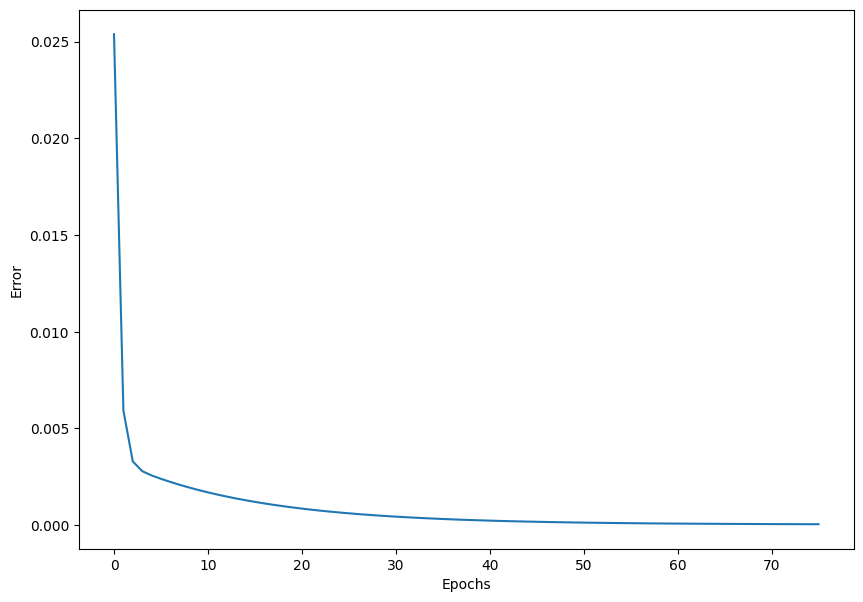

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()



---



#[Gradient Descent 구현(다항식)](https://)

- 샘플 데이터를 생성
>- 이번에는 [Feature Data, 즉 X 값이 여러 개인 다항식의](https://) 경우에 대해서도 구해보자
>- 다항식에서는 [X의 갯수 만큼, W 갯수도 늘어날 것임](https://) -> 다만, bias (b)의 계수는 1개임 [링크 텍스트](https://)

In [ ]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [ ]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + 0.9



---



#[Gradient Descent 구현(다항식)](https://)

- 다항식을 정의

In [ ]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)

b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):

    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b


    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break


    # 미분값 적용(Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()

    b = b - learning_rate * (y_hat - y).mean()

    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.55945, w2 = 0.28978, w3 = 1.10518, b = 0.61231 error = 0.30411
 5 w1 = 0.54629, w2 = 0.36447, w3 = 1.05100, b = 0.66793 error = 0.01741
10 w1 = 0.51840, w2 = 0.40870, w3 = 0.99396, b = 0.68753 error = 0.01196
15 w1 = 0.49380, w2 = 0.44284, w3 = 0.94771, b = 0.70539 error = 0.00835
20 w1 = 0.47212, w2 = 0.46900, w3 = 0.91006, b = 0.72168 error = 0.00593
25 w1 = 0.45302, w2 = 0.48885, w3 = 0.87926, b = 0.73654 error = 0.00429
30 w1 = 0.43621, w2 = 0.50373, w3 = 0.85394, b = 0.75011 error = 0.00317
35 w1 = 0.42141, w2 = 0.51469, w3 = 0.83302, b = 0.76251 error = 0.00238
40 w1 = 0.40836, w2 = 0.52259, w3 = 0.81562, b = 0.77385 error = 0.00182
45 w1 = 0.39686, w2 = 0.52810, w3 = 0.80108, b = 0.78422 error = 0.00142
50 w1 = 0.38670, w2 = 0.53175, w3 = 0.78884, b = 0.79372 error = 0.00112
55 w1 = 0.37773, w2 = 0.53397, w3 = 0.77848, b = 0.80241 error = 0.00089
60 w1 = 0.36980, w2 = 0.53509, w3 = 0.76965, b = 0.81038 error = 0.00072
65 w1 = 0.36276, w2 = 0.53538, w3 = 0.76208, b = 0.

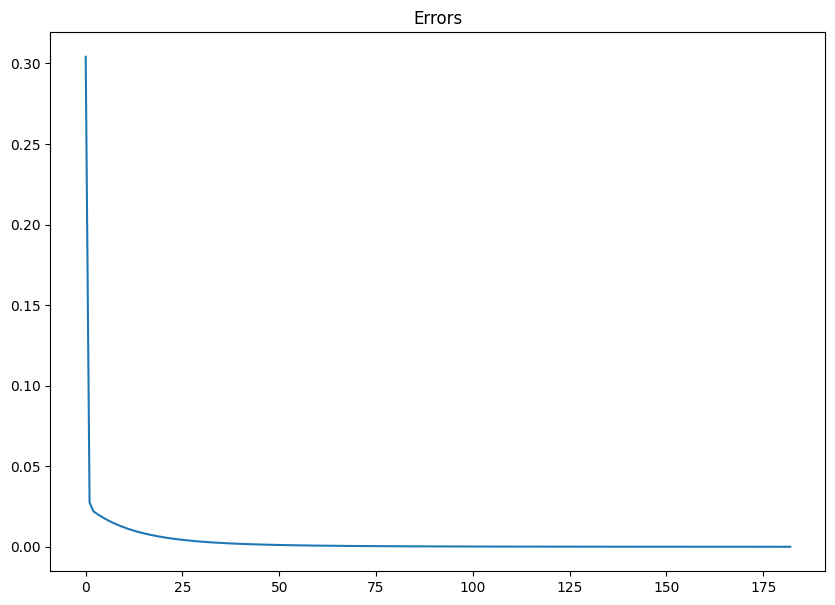

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.title('Errors')
plt.show()

# [Epoch가 지남에 따라 어떻게 가중치들이 업데이트 되는지 시각화](https://)

- 가중치 (W1, W2, W3) 값들의 변화량 시각화 [링크 텍스트](https://)

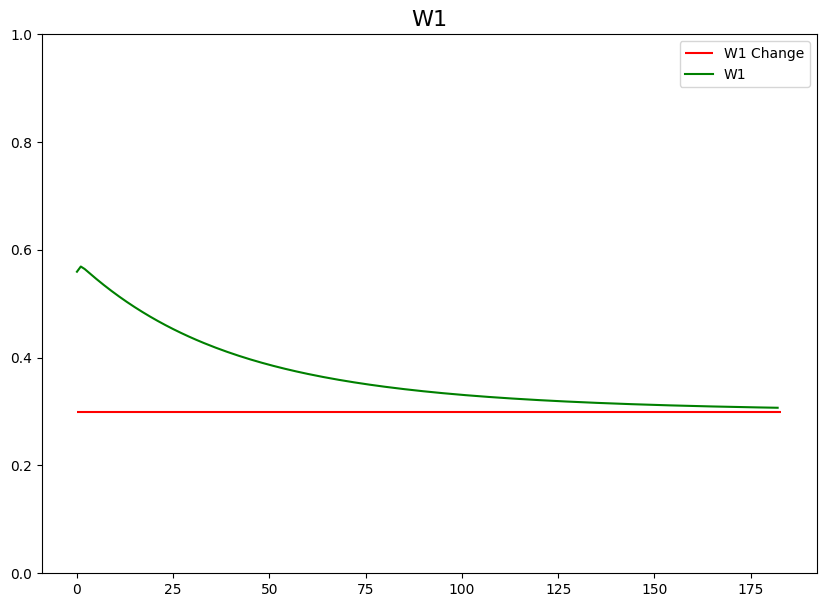

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

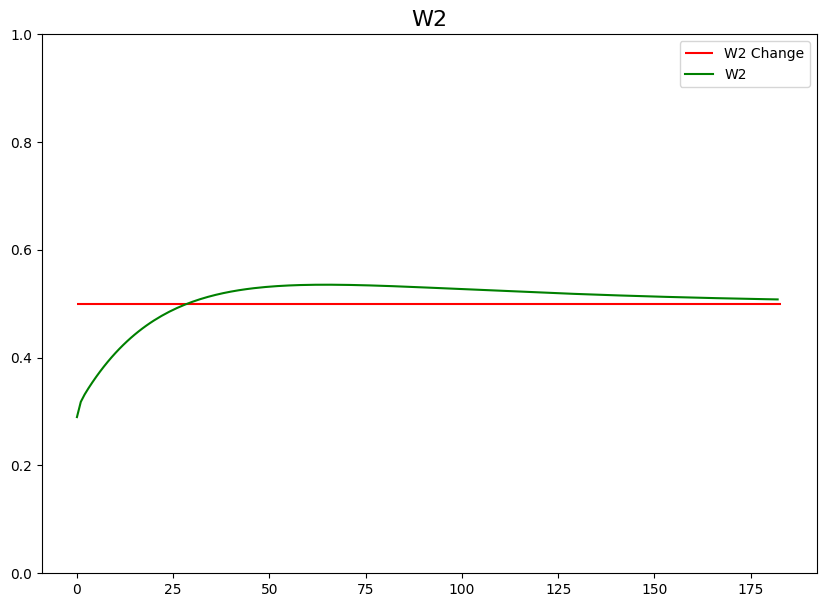

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

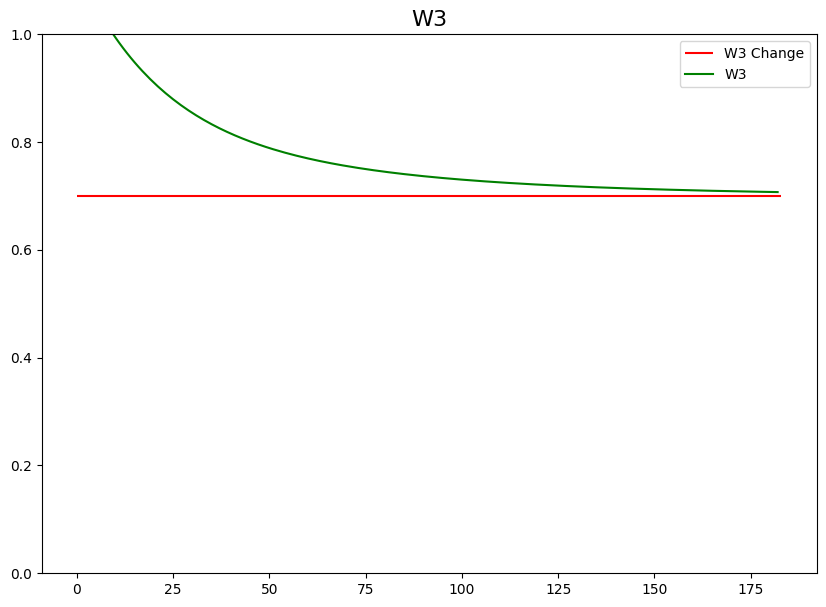

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()



---



#[확률적 경사 하강법 분류 모델(SGDClassifier)](https://)

In [2]:
!pip uninstall numpy
!pip install numpy==1.25.0

yimport numpy as np
print(np.__version__)

Found existing installation: numpy 1.25.0
Uninstalling numpy-1.25.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.11
    /usr/local/lib/python3.11/dist-packages/numpy-1.25.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-7a851222.3.23.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.25.0
  Using cached numpy-1.25.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires nu

1.25.0


In [3]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
#Species 열을 제외한 나머지 5개는 입력 데이터로 사용
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
#train_test_split() 함수를 사용해 이 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [6]:
#훈련 세트와 테스트 세트의 특성을 표준화 전처리 수행
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
#확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier를 임포트
#이진 분류(binary classification)를 위해 sklearn이 범용화된 class를 제공
#→ 확률적 경사 하강법(SGD classifier) →Stochastic Gradient Descent algorithm 이용
#→ SVM, Logistic regression 등을 제공

from sklearn.linear_model import SGDClassifier

In [8]:
#SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
#tol 매개변수에서 향상될 최소값을 지정
#tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복하도록 함

!pip install -U scikit-learn==1.2.2

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [9]:
#확률적 경사 하강법의 점진적 학습 시 SGDClassifier 객체를 다시 만들지 않고
#훈련한 모델 sc를 추가로 더 훈련할 수 있음
#모델을 이어서 훈련할 때는 partial_fit() 메서드를 사용함
#partial_fit() 메서드를 호출은 1에포트를 이어서 훈련할 수 있음


#tol의 값은 반복학습을 진행하다 보면 반복학습이 진행될 때마다 loss 값이 산출되고, 이 loss의값이 줄어들어야 함.
#이 줄어드는 loss값이 tol값보다 클 동안만 반복학습을 진행 → 일정 순간이 되면 loss값의 변화가 미세하게 줄어지기 때문에 시간 절약

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9411764705882353
0.925


# [에포크와 과대/과소적합](https://)

In [10]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

#partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 주어야 함
#이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만듬
#에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비
#300번의 에포크 동안 훈련을 반복하여 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score #리스트에 추가
for _ in range(0, 300):
   sc.partial_fit(train_scaled, train_target, classes=classes)
   train_score.append(sc.score(train_scaled, train_target))
   test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


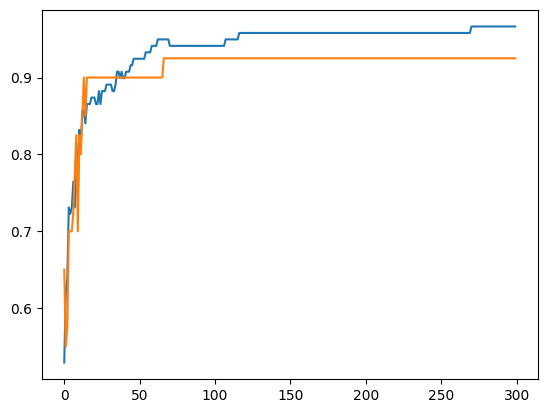

In [11]:
#300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려보기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)

#백 번째 에포크 이후에는 훈련 세트와 테스트 세 트의 점수가 조금씩 벌어짐
#에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮음
#백 번째 에포크가 적절한 반복 횟수로 보임
plt.show()

In [12]:
#SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
#tol 매개변수에서 향상될 최소값을 지정
#tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복하도록 함

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [13]:
#loss 매개변수의 기본값은 ‘hinge’임
#hinge loss은 서포트 벡터 머신(support vector machine)이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
